In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 读取文件
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')

def build_df(file_path, is_train):
    result_df = None
    if is_train:
        result_df = pd.read_csv(file_path, parse_dates=['start_time','end_time'], date_parser=dateparse,
                                dtype={'r_key': np.str, 'out_id': np.str, 'start_time': np.str, 'end_time': np.str,
                                       'start_lat': np.float, 'start_lon': np.float, 'end_lat': np.float,
                                       'end_lon': np.float})
    else:
        result_df = pd.read_csv(file_path, parse_dates=['start_time'], date_parser=dateparse,
                                dtype={'r_key': np.str, 'out_id': np.str, 'start_time': np.str, 'end_time': np.str,
                                       'start_lat': np.float, 'start_lon': np.float})
    return result_df

train_df = build_df('../data/extracted/train.csv',True)
test_df = build_df('../data/extracted/test.csv',False)
print('columns : {}'.format(train_df.columns))
print('train_df.shape : {}'.format(train_df.shape))
print('test_df.shape : {}'.format(test_df.shape))

columns : Index(['r_key', 'out_id', 'start_time', 'end_time', 'start_lat', 'start_lon',
       'end_lat', 'end_lon'],
      dtype='object')
train_df.shape : (1448321, 8)
test_df.shape : (47493, 5)


In [12]:
k = 4
train_start_pos = train_df.apply(lambda row: str(round(row['start_lat'], k)) + '_' + str(round(row['start_lon'], k)),
                                 axis=1)
train_end_pos = train_df.apply(lambda row: str(round(row['end_lat'], k)) + '_' + str(round(row['end_lon'], k)), axis=1)
train_pos = pd.concat([train_start_pos, train_end_pos], axis=0)

In [13]:
print(train_start_pos.shape)
print(train_end_pos.shape)
print(train_start_pos.drop_duplicates().shape)
print(train_end_pos.drop_duplicates().shape)
print(train_pos.shape)
print(train_pos.drop_duplicates().shape)

(1448321,)
(1448321,)
(1018051,)
(870553,)
(2896642,)


(1792479,)


In [19]:
# 判断一辆车的历史数据中, 起始点去重数, 终点去重数, 起始点+终点去重数
k = 4
train_df['start_pos'] = train_df.apply(lambda row: str(round(row['start_lat'], k)) + '_' + str(round(row['start_lon'], k)),
                                 axis=1)
train_df['end_pos'] = train_df.apply(lambda row: str(round(row['end_lat'], k)) + '_' + str(round(row['end_lon'], k)), axis=1)
temp_df = train_df[['out_id','start_pos','end_pos']]
temp_df_start = train_df[['out_id','start_pos']].drop_duplicates().groupby('out_id').size()
temp_df_end = train_df[['out_id','end_pos']].drop_duplicates().groupby('out_id').size()

temp_df_2 = pd.concat([train_df[['out_id','start_pos']],train_df[['out_id','end_pos']]])

KeyboardInterrupt: 

In [26]:
temp_df_start = train_df[['out_id','start_pos']]
temp_df_start.columns = ['out_id','pos']
temp_df_end = train_df[['out_id','end_pos']]
temp_df_end.columns = ['out_id','pos']
temp_df_2 = pd.concat([temp_df_start ,temp_df_end])
temp_df_3 = temp_df_2.drop_duplicates().groupby('out_id').size()
print(temp_df_2.shape)
print(temp_df_3)

(2896642, 2)
out_id
2016061820000b           173
358962079107966          373
358962079111695          447
358962079120563          294
4A23256745CBA3B0         278
663321706008871          103
673691705008931           73
698851707000191          237
698851707000261          263
815821712000052          265
815821801000740          322
851181601004171          361
851181601028851          397
851181601046893          172
851181601098191          218
851181601098201          294
851181601098271          361
851181601099451          328
861021508004521          494
861021508005421          253
861021508005811           77
861021509004701          251
861021509011351          590
861021509014661          202
861021509015321          446
861021509017441          186
861021510000222          267
861021510002172          204
861021510002522          353
861021510007852          456
                        ... 
891941605003621          171
891941605004011          291
891941605004231        

In [ ]:
print(temp_df_2.drop_duplicates())

In [18]:
print(temp_df_2)

out_id
2016061820000b            96
358962079107966          182
358962079111695          244
358962079120563          158
4A23256745CBA3B0         161
663321706008871           81
673691705008931           63
698851707000191          132
698851707000261          149
815821712000052          159
815821801000740          185
851181601004171          188
851181601028851          198
851181601046893           95
851181601098191          113
851181601098201          148
851181601098271          211
851181601099451          169
861021508004521          254
861021508005421          153
861021508005811           55
861021509004701          126
861021509011351          282
861021509014661          108
861021509015321          230
861021509017441           94
861021510000222          156
861021510002172          102
861021510002522          229
861021510007852          236
                        ... 
891941605003621          102
891941605004011          149
891941605004231          204
8919416

In [37]:
df_7852 = train_df[train_df['out_id'] == '861021510007852']

In [33]:
train_start_lat = list(train_df['start_lat'].round(4))
print(len(train_start_lat))
train_start_lat_drop_dup = list(train_df['start_lat'].round(4).drop_duplicates())
print(len(train_start_lat_drop_dup))

1448321
183387


In [42]:
# r_key 样本id
# out_id 车辆id
# start_time 行程开始时间
# end_time 行程结束时间
# start_lat 出发地维度
# start_lon 出发地经度
# end_lat 目的地维度
# end_lon 目的地经度

In [42]:
# 车辆id分析
out_id_train_distinct = train_df['out_id'].drop_duplicates()
print('train | out_id | distinct value : {}'.format(out_id_train_distinct.shape))
out_id_test_distinct = test_df['out_id'].drop_duplicates()
print('test | out_id | distinct value : {}'.format(out_id_test_distinct.shape))

out_id_train_dis_set = set(out_id_train_distinct)
out_id_test_dis_set = set(out_id_test_distinct)

counter = 0
out_id_union = []
for ele in out_id_train_dis_set:
    if ele in out_id_test_dis_set:
        counter += 1
        out_id_union.append(ele)
print('train|out_id|also_in_test : {}'.format(counter))
# 证明测试集中全部数据都来自于训练集中, 所以这是一个根据历史数据推荐的问题.

train | out_id | distinct value : (5817,)
test | out_id | distinct value : (5734,)
train|out_id|also_in_test : 5734


(array([  7.,  15.,  25.,  24.,  45.,  38.,  46.,  59.,  71., 109., 105.,
        128., 118.,  96., 163., 151., 140., 141., 133., 103., 141., 123.,
        134., 116., 121., 134.,  79.,  87., 131.,  82., 101.,  85., 119.,
         76., 103.,  94.,  98.,  92.,  78.,  61.,  69.,  78.,  70.,  83.,
         74.,  66.,  43.,  61.,  70.,  86.,  66.,  66.,  66.,  52.,  62.,
         50.,  43.,  51.,  60.,  34.,  51.,  36.,  53.,  46.,  55.,  36.,
         34.,  41.,  30.,  27.,  32.,  26.,  33.,  19.,  18.,  22.,  20.,
         34.,  23.,  15.,  16.,  23.,  14.,  16.,  15.,   9.,  13.,   9.,
          8.,   4.,   1.,   3.,   1.,   4.,   1.,   4.,   0.,   1.,   0.,
          2.]),
 array([ 82.  ,  86.85,  91.7 ,  96.55, 101.4 , 106.25, 111.1 , 115.95,
        120.8 , 125.65, 130.5 , 135.35, 140.2 , 145.05, 149.9 , 154.75,
        159.6 , 164.45, 169.3 , 174.15, 179.  , 183.85, 188.7 , 193.55,
        198.4 , 203.25, 208.1 , 212.95, 217.8 , 222.65, 227.5 , 232.35,
        237.2 , 242.05, 246.9 

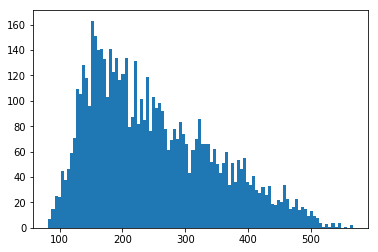

In [42]:
records_train_gb_out_id = train_df.groupby('out_id').size() 
plt.hist(list(records_train_gb_out_id), bins=100)

In [42]:
train_start_lat = list(train_df['start_lat'].round(4))
print(len(train_start_lat))
train_start_lat_drop_dup = list(train_df['start_lat'].round(4).drop_duplicates())
print(len(train_start_lat_drop_dup))

1448321
183387


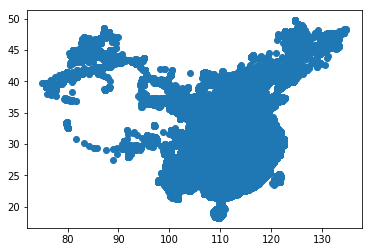

In [42]:
train_start_lat = train_df['start_lat']
train_start_lon = train_df['start_lon'] 
plt.scatter(list(train_start_lon),list(train_start_lat))

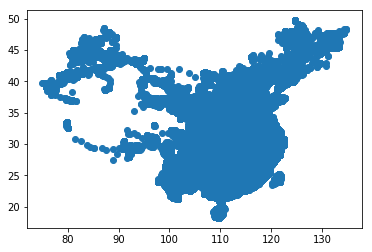

In [42]:
train_end_lat = train_df['end_lat']
train_end_lon = train_df['end_lon'] 
plt.scatter(list(train_end_lon),list(train_end_lat))

In [42]:
from math import radians, atan, tan, sin, acos, cos


def getDistance(latA, lonA, latB, lonB):
    ra = 6378140  # radius of equator: meter
    rb = 6356755  # radius of polar: meter
    flatten = (ra - rb) / ra  # Partial rate of the earth
    # change angle to radians
    radLatA = radians(latA)
    radLonA = radians(lonA)
    radLatB = radians(latB)
    radLonB = radians(lonB)

    try:
        pA = atan(rb / ra * tan(radLatA))
        pB = atan(rb / ra * tan(radLatB))
        x = acos(sin(pA) * sin(pB) + cos(pA) * cos(pB) * cos(radLonA - radLonB))
        c1 = (sin(x) - x) * (sin(pA) + sin(pB)) ** 2 / cos(x / 2) ** 2
        c2 = (sin(x) + x) * (sin(pA) - sin(pB)) ** 2 / sin(x / 2) ** 2
        dr = flatten / 8 * (c1 - c2)
        distance = ra * (x + dr)
        return distance  # meter
    except:
        return 0.0000001

In [42]:
train_distance_df = train_df[['start_lat','start_lon','end_lat','end_lon']].astype(float)
train_distance_list = []
for row in train_distance_df.values:
    d = int(getDistance(row[0],row[1],row[2],row[3]))
    train_distance_list.append(d) 
train_distance_series = pd.Series(data=train_distance_list,name='train_distance')
train_distance_series.describe()

count    1.448321e+06
mean     9.363044e+03
std      2.138324e+04
min      0.000000e+00
25%      1.425000e+03
50%      3.666000e+03
75%      9.095000e+03
max      9.137840e+05
Name: train_distance, dtype: float64

In [42]:
# 计算每辆车在train中, 历史终点在不同精度下去重值. -S
train_temp_1 = train_df[['out_id', 'end_lat', 'end_lon']]
train_temp_1_df = train_df['out_id'].drop_duplicates().to_frame()
train_temp_1_df = train_temp_1_df.set_index(train_temp_1_df['out_id'])

for i in [4,5,6]:
    col_name = 'dest_{}'.format(i)
    test_df[col_name] = test_df.apply(lambda row: str(round(row['end_lat'], i)) + '_' + str(round(row['end_lon'], i)))
    result_sr = test_df[['out_id', col_name]].drop_duplicates().groupby('out_id').size()
    col_size_name = 'dest_{}_n'.format(i)
    result_df = result_sr.to_frame(name=col_size_name) 
    test_result_df = train_temp_1_df.merge(result_df,left_index=True,right_index=True)

KeyError: ('end_lat', 'occurred at index r_key')

In [ ]:
range_list = [4,5,6]
for index, i in enumerate(range_list):
    values = test_result_df['dest_{}_n'.format(i)].values
    plt.subplot(len(range_list),1,index+1)
    plt.hist(values,bins=100)

NameError: name 'test_result_df' is not defined